<a href="https://colab.research.google.com/github/alamau01/Thesis-in-EE/blob/master/Stock_Price_Prediction_LSTM_Keras_Goldman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

dataset = web.DataReader('GS', data_source = 'yahoo', start = '2000-01-01', end = '2020-03-31')
dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,94.375000,87.750000,94.187500,88.312500,1822600.0,70.332947
2000-01-04,87.500000,82.250000,87.000000,82.750000,1647700.0,65.902901
2000-01-05,81.875000,78.375000,80.875000,78.875000,1516600.0,62.816811
2000-01-06,84.500000,78.625000,78.625000,82.250000,1845100.0,65.504669
2000-01-07,83.187500,79.875000,83.062500,82.562500,1127400.0,65.753601
...,...,...,...,...,...,...
2020-03-25,162.210007,145.320007,154.600006,155.130005,8587800.0,155.130005
2020-03-26,167.660004,154.309998,156.369995,165.789993,6762200.0,165.789993
2020-03-27,163.729996,157.000000,159.080002,158.339996,4186700.0,158.339996


In [0]:
dataset.shape

(5093, 6)

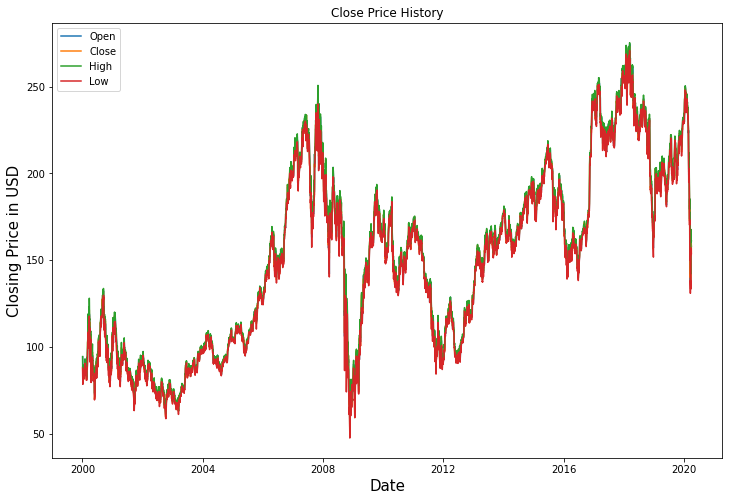

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(dataset['Open'])
plt.plot(dataset['Close'])
plt.plot(dataset['High'])
plt.plot(dataset['Low'])
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Closing Price in USD', fontsize = 15)
plt.title('Close Price History')
plt.legend(['Open', 'Close', 'High', 'Low'], loc = 'upper left')
plt.show()

In [0]:
close_price = dataset.filter(['Close']).values
data_train_len = math.ceil(len(close_price) * .8)

sc = MinMaxScaler(feature_range = (0, 1))
sc_data = sc.fit_transform(close_price)

data_train = sc_data[0 : data_train_len, : ]
xtrain = []
ytrain = []
for i in range(60, len(data_train)):
    xtrain.append(data_train[i - 60 : i, 0])
    ytrain.append(data_train[i, 0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
xtrain.shape

(4015, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(units = 512, return_sequences = True, input_shape = (xtrain.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 512, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 512, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 512, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(xtrain, ytrain, batch_size = 128, epochs = 150)

Epoch 1/150
32/32 [==============================] - 2s 77ms/step - loss: 0.0387
Epoch 2/150
32/32 [==============================] - 2s 77ms/step - loss: 0.0016
Epoch 3/150
32/32 [==============================] - 2s 77ms/step - loss: 0.0011
Epoch 4/150
32/32 [==============================] - 2s 76ms/step - loss: 0.0011
Epoch 5/150
32/32 [==============================] - 2s 77ms/step - loss: 9.6001e-04
Epoch 6/150
32/32 [==============================] - 2s 77ms/step - loss: 9.3079e-04
Epoch 7/150
32/32 [==============================] - 2s 77ms/step - loss: 9.6728e-04
Epoch 8/150
32/32 [==============================] - 2s 77ms/step - loss: 8.7894e-04
Epoch 9/150
32/32 [==============================] - 2s 77ms/step - loss: 8.4045e-04
Epoch 10/150
32/32 [==============================] - 2s 77ms/step - loss: 8.1950e-04
Epoch 11/150
32/32 [==============================] - 2s 76ms/step - loss: 8.5985e-04
Epoch 12/150
32/32 [==============================] - 2s 76ms/step - loss: 8.37

In [0]:
data_test = sc_data[data_train_len - 60 : , :]
xtest = []
ytest = close_price[data_train_len :, :]
for i in range(60, len(data_test)):
    xtest.append(data_test[i - 60 : i, 0])

xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

In [0]:
close_price_pred = model.predict(xtest)
close_price_pred = sc.inverse_transform(close_price_pred)
rmse_score = np.sqrt(np.mean(((close_price_pred - ytest) ** 2)))
rmse_score

3.746717637514788

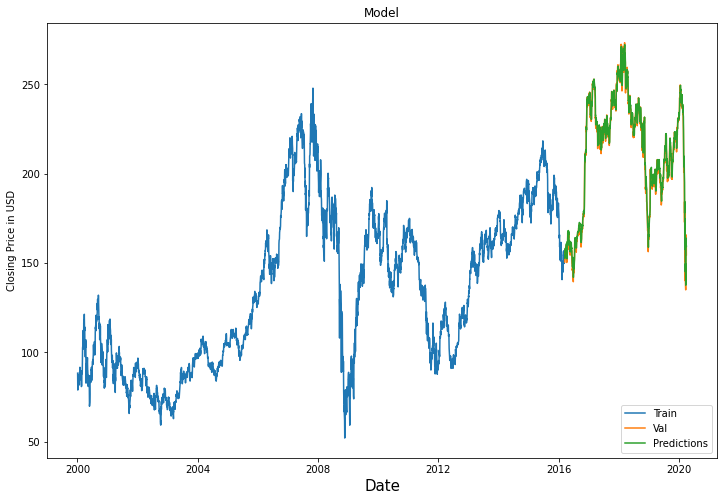

In [0]:
train = dataset.filter(['Close'])[: data_train_len]
valid = dataset.filter(['Close'])[data_train_len :]
valid['Predictions'] = close_price_pred

plt.figure(figsize = (12, 8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Closing Price in USD')
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.title('Model')
plt.show()

In [0]:
valid

,Close,Predictions
Date,,
2016-03-16,150.539993,154.197479
2016-03-17,152.910004,152.667786
2016-03-18,157.600006,154.213913
2016-03-21,156.289993,158.235840
2016-03-22,154.199997,157.987610
...,...,...
2020-03-25,155.130005,151.135147
2020-03-26,165.789993,154.827988
2020-03-27,158.339996,164.005096


In [0]:
gs_stock_price = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2019-12-17')
new_dataset = gs_stock_price.filter(['Close'])
last_60_days = new_dataset[-60 :].values
last_60_days_sc = sc.transform(last_60_days)
xtest1 = []
xtest1.append(last_60_days_sc)
xtest1 = np.array(xtest1)
xtest1 = np.reshape(xtest1, (xtest1.shape[0], xtest1.shape[1], 1))
pred_price = model.predict(xtest1)
pred_price = sc.inverse_transform(pred_price)
print(pred_price)

[[279.43756]]


In [0]:
apple_stock_2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2019-12-26', end = '2019-12-26')
print(apple_stock_2['Close'])

Date
2019-12-26    289.910004
Name: Close, dtype: float64
